This notebook contains all code used to make my thesis plots.

In [112]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib.pyplot import cm
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from itertools import izip
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter, MultipleLocator
from collections import namedtuple

%matplotlib inline

get_ipython().magic(u'load_ext autoreload')
get_ipython().magic(u'autoreload 2')


mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (7.0, 4.0)  # default size of plots
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['xtick.minor.size'] = 5
mpl.rcParams['ytick.minor.size'] = 5
mpl.rcParams['legend.framealpha'] = 0.6
mpl.rcParams['legend.scatterpoints'] = 1
mpl.rcParams['legend.numpoints'] = 1
# mpl.rcParams.update({'font.size': 24, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
mpl.rcParams.update({'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
pd.set_option('display.max_colwidth', 120)
pd.set_option('display.max_columns', 200)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [83]:
from common_plots import *

In [4]:
# Make subsets based on masses, and passing ALL NMSSMTools constraints (i.e. don't ignore g-2 and relic density)
from make_hdf5 import subset_var

In [5]:
# Here get your dataframes.
# Extract dataframes from binary
store = pd.HDFStore("points_500_MICRO_SCAN_NTv491_HBv431_HSv140_largeRange_DMass2_fixAssignMass_19_May_16_1513.h5")
# df_orig = store.full12loop_all
df_pass_all = store.full12loop_good_posMuMagMom_planckUpperOnly_ignorebctaunu_ignorechi2 #'relaxed' constraints - +ve g-2 and omegah^2

store.close()

In [6]:
df_pass_all_ma1 = subset_var(df_pass_all, 3.5, 10.5, 'ma1')

In [499]:
SAVE_PLOTS = True

if SAVE_PLOTS:
#     get_ipython().magic(u"config InlineBackend.figure_formats = 'pdf', ")
    get_ipython().magic(u"config InlineBackend.figure_formats = 'png', ")
    mpl.rcParams['savefig.dpi'] = 100
else:
    get_ipython().magic(u"config InlineBackend.figure_formats = 'png', ")
    mpl.rcParams['savefig.dpi'] = 72

In [282]:
for k,v in mpl.rcParams.iteritems():
    if 'dpi' in k.lower():
        print k, v

figure.dpi 80.0
savefig.dpi 72.0


In [250]:
title = 'Relaxed constraints'
SIZE = 15

In [515]:
def plot_ma1_inputparams(df, title, filename):
    plot_input_params_scatters(df, 'ma1', r'$m_{a_1}\ \mathrm{[GeV]}$', 
                               yrange=[0, 20], title=title, cols=2, s=SIZE)
    if SAVE_PLOTS: save_plot(filename)

In [ ]:
plot_ma1_inputparams(df_pass_all, title, 'Thesis_plots/ma1_inputparams_relaxed.pdf')

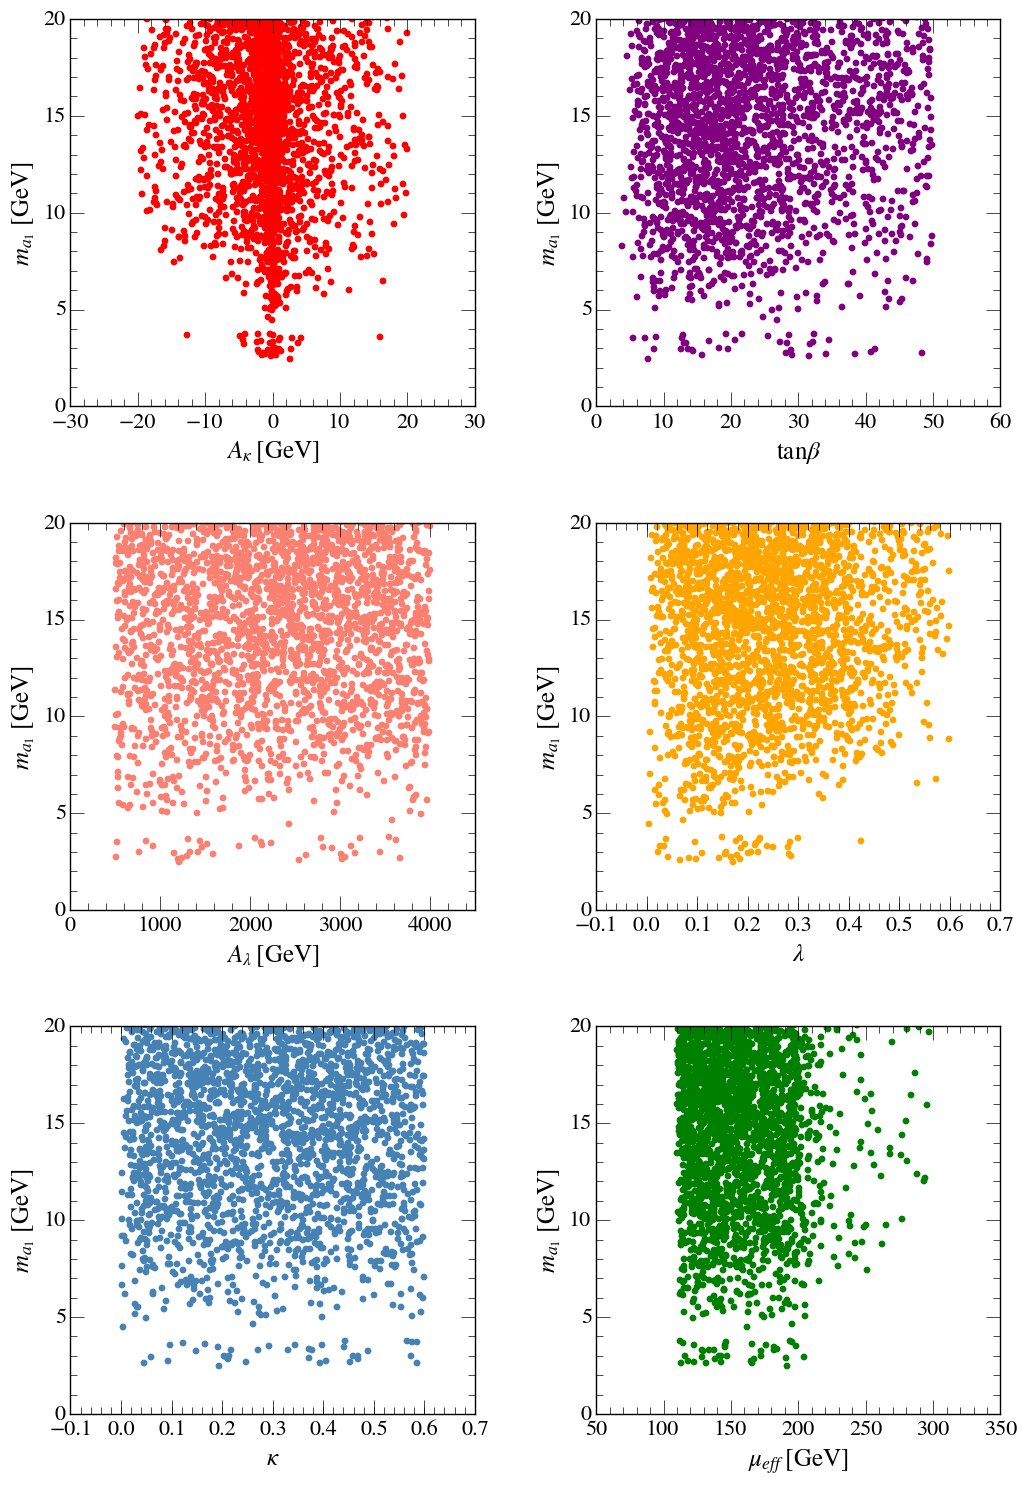

In [516]:
plot_ma1_inputparams(df_pass_all, title, 'Thesis_plots/ma1_inputparams_relaxed.png')

In [513]:
def plot_mh1_inputparams(df, title, filename):
    plot_input_params_scatters(df, 'mh1', r'$m_{h_1}\ \mathrm{[GeV]}$', 
                               yrange=[0, 150], 
                               title=title, cols=2, s=SIZE)
    if SAVE_PLOTS: save_plot(filename)

In [ ]:
plot_mh1_inputparams(df_pass_all, title, 'Thesis_plots/mh1_inputparams_relaxed.pdf')

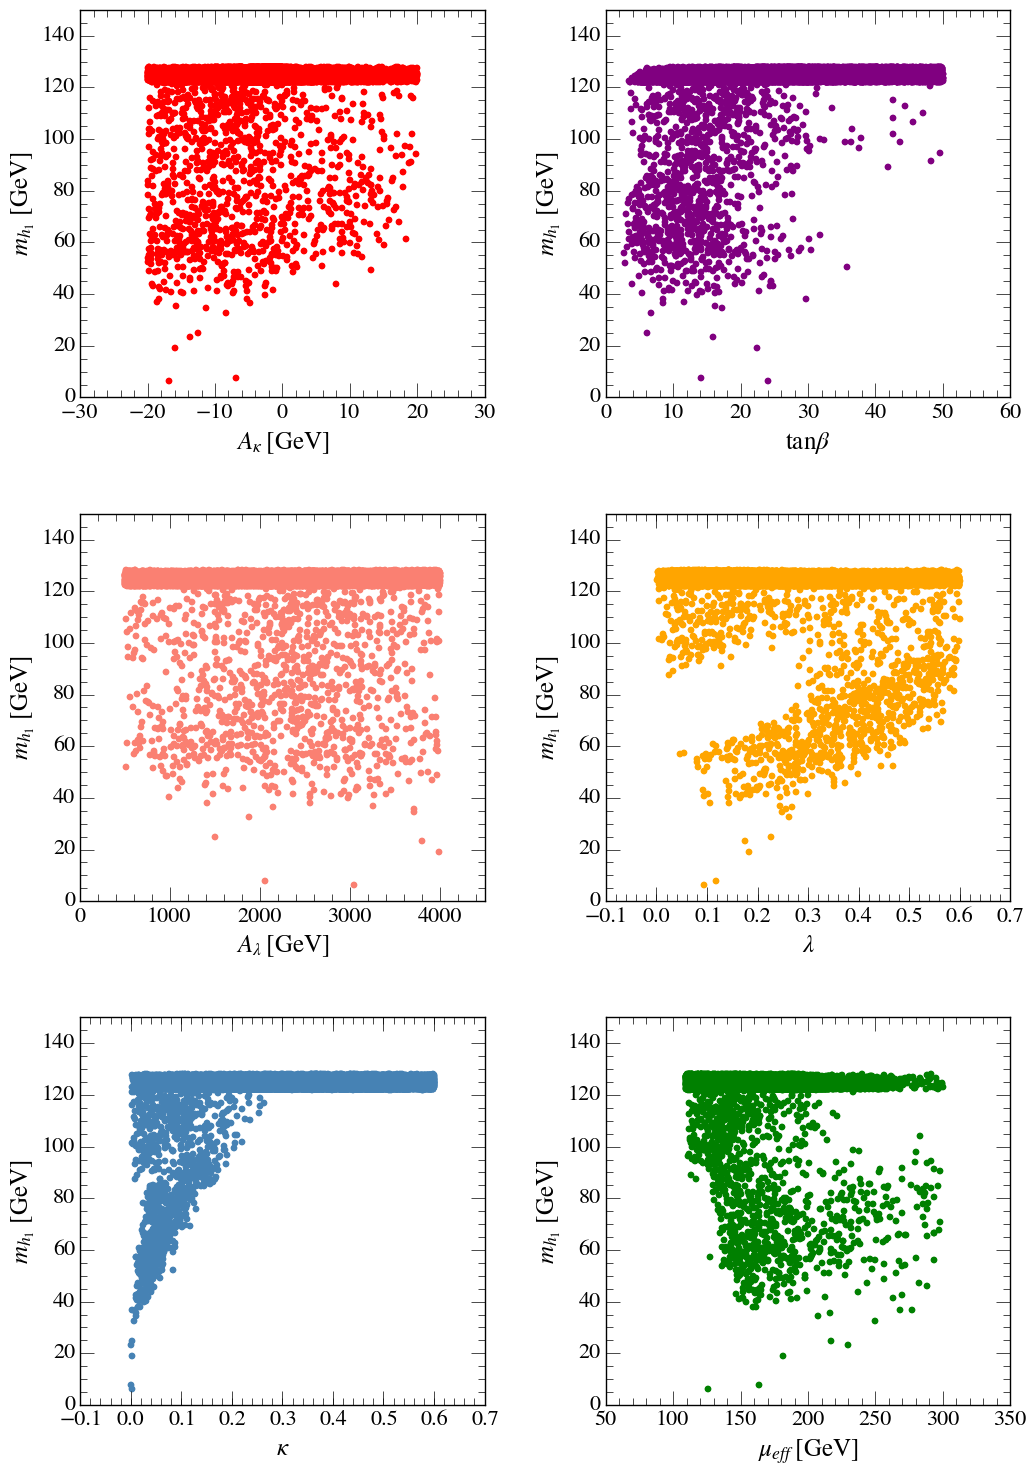

In [514]:
plot_mh1_inputparams(df_pass_all, title, 'Thesis_plots/mh1_inputparams_relaxed.png')

In [256]:
title = ''

In [506]:
def plot_mh1_ma1_scatter(df, title, filename):
    plot_scatter(df=df, xvar='ma1', yvar='mh1', 
                 xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$', 
                 ylabel=r'$m_{h_1}\ \mathrm{[GeV]}$',
                 color='dodgerblue', s=SIZE)
    plt.xlim(0, 60)
    plt.ylim(0, 140)
    plt.title(title)
    
    xmin, xmax = plt.xlim()
    ymin, ymax = xmin, xmax
    plt.plot([xmin, xmax], [ymin, ymax], linestyle='dashed', 
             label=r'$m_{h_1} =\ m_{a_1}$', linewidth=2)

#     plt.plot([xmin, xmax], [2*ymin, 2*ymax], linestyle='dashed', color='red',
#              label=r'$m_{h_1} =\ 2m_{a_1}$', linewidth=2)

#     plt.plot([xmin, xmax], [62.5, 62.5], linestyle='dashed', color='purple',
#              label=r'$m_{h_1} =\ 62.5\ \mathrm{GeV}$', linewidth=2)

    make_highlight_region(plt.gca(), [125-3, 125+3], 
                          'Y', color='k', alpha=1, fill=False,
                          label=r'$125 \pm 3\ \mathrm{GeV}$', hatch='xxx')
    
#     make_highlight_region(plt.gca(), [0, 62.5], 
#                           'Y', color='darkorchid', alpha=0.25, fill=True,
#                           label=r'$h_2 \to 2h_1\ \mathrm{allowed}$')

#     poly = patches.Polygon([[0, 0], [60, 0], [60, 62.5], [62.5/2, 62.5]], closed=True, 
    poly = patches.Polygon([[0, 0], [60, 0], [60, 62.5], [0, 62.5]], closed=True, 
                           color='darkorchid', fill=True, hatch='//', 
                           label=r'$h_2 \to 2h_1\ \mathrm{allowed}$', alpha=0.25)
    plt.gca().add_patch(poly)
    
    poly2 = patches.Polygon([[0, 0], [62.5/2, 62.5], [0, 62.5]], closed=True, 
                           fill=True, color='red', hatch=r"\\",
                           label=r'$h_2 \to 2h_1 \to 4a_1\ \mathrm{allowed}$', alpha=0.25)
    plt.gca().add_patch(poly2)

#     make_highlight_region(plt.gca(), [0, 62.5], 
#                           'Y', color='purple', alpha=0.2,
#                           label=r'$h_2 \to 2h_1\ \mathrm{allowed}$')

    plt.legend(loc='lower right', frameon=True, bbox_to_anchor=(1,0), framealpha=0.8, fontsize=14)
    if SAVE_PLOTS: save_plot(filename)

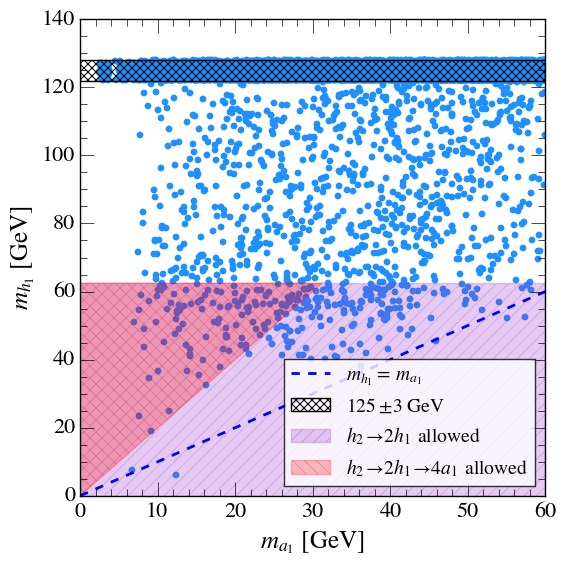

In [507]:
plot_mh1_ma1_scatter(df_pass_all, title, 'Thesis_plots/mh1_ma1_relaxed.png')

In [ ]:
plot_mh1_ma1_scatter(df_pass_all, title, 'Thesis_plots/mh1_ma1_relaxed.pdf')

(<matplotlib.axes._subplots.AxesSubplot at 0x10ca32dd0>,
 <matplotlib.collections.PathCollection at 0x10c9aabd0>)

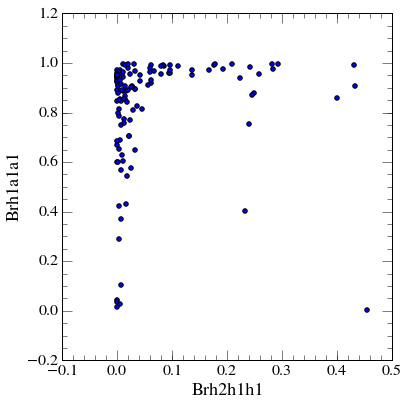

In [324]:
plot_scatter(df=df_pass_all.query('mh2 < 128.1'), xvar='Brh2h1h1', yvar='Brh1a1a1')

In [334]:
dff = df_pass_all.query('mh2<128.1')
nu_tautau =  dff['xsec_8_ggf_h2_2h1_4b'] * dff['Brh1a1a1'] * dff['Brh1a1a1'] * dff['Bra1tautau'] * dff['Bra1tautau'] / (dff['Brh1bb'] * dff['Brh1bb'])
nu_tautau = nu_tautau.dropna()

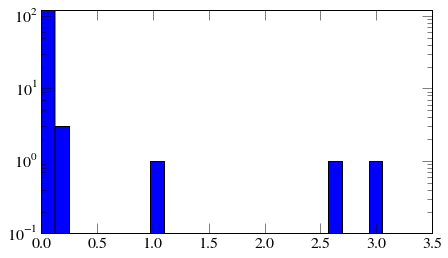

In [342]:
plt.hist(nu_tautau.values, bins=25)
plt.ylim(bottom=0.1)
plt.yscale('log')

In [343]:
dff = df_pass_all.query('mh2<128.1')
nu_bb =  dff['xsec_8_ggf_h2_2h1_4b'] * dff['Brh1a1a1'] * dff['Brh1a1a1'] * dff['Bra1bb'] * dff['Bra1bb'] / (dff['Brh1bb'] * dff['Brh1bb'])
nu_bb = nu_bb.dropna()

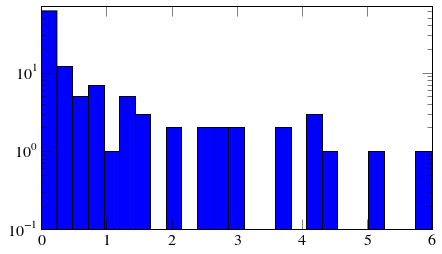

In [344]:
plt.hist(nu_bb.values, bins=25)
plt.ylim(bottom=0.1)
plt.yscale('log')

In [508]:
def plot_mh2_ma1_scatter(df, title, filename):
    plot_scatter(df=df, xvar='ma1', yvar='mh2', 
                 xlabel=r'$m_{a_1}\ \mathrm{[GeV]}$', 
                 ylabel=r'$m_{h_2}\ \mathrm{[GeV]}$', 
                 color='green', s=SIZE)
    plt.xlim(0, 60)
    plt.ylim(80, 320)
#     plt.yscale('log')
    plt.title(title)
    make_highlight_region(plt.gca(), [125-3, 125+3], 
                          'Y', color='k', alpha=1, fill=False, hatch="xxx", 
                          label=r'$125 \pm 3\ \mathrm{GeV}$')
    plt.legend(loc='lower right', frameon=False)
    if SAVE_PLOTS: save_plot(filename)

In [ ]:
plot_mh2_ma1_scatter(df_pass_all, title, 'Thesis_plots/mh2_ma1_relaxed.pdf')

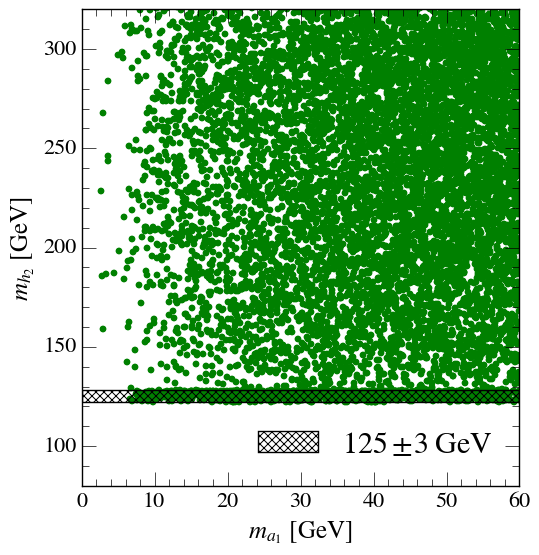

In [509]:
plot_mh2_ma1_scatter(df_pass_all, title, 'Thesis_plots/mh2_ma1_relaxed.png')

In [510]:
def plot_mh2_mh1_scatter(df, title, filename):
    plot_scatter(df=df, xvar='mh1', yvar='mh2', 
                 xlabel=r'$m_{h_1}\ \mathrm{[GeV]}$', 
                 ylabel=r'$m_{h_2}\ \mathrm{[GeV]}$',
                 color='red', s=SIZE)
    plt.xlim(0, 140)
    plt.ylim(80, 320)
    
    xmin, xmax = plt.xlim()
    ymin, ymax = xmin, xmax
    plt.plot([xmin, xmax], [ymin, ymax], linestyle='dashed', 
             label=r'$m_{h_2} =\ m_{h_1}$', linewidth=2)

    plt.title(title)
    make_highlight_region(plt.gca(), [125-3, 125+3], 
                          'X', color='k', alpha=1, fill=False, hatch='xxx')
    make_highlight_region(plt.gca(), [125-3, 125+3], 
                          'Y', color='k', alpha=1, fill=False, hatch='xxx', 
                          label=r'$125 \pm 3\ \mathrm{GeV}$')
    plt.legend(loc='upper left', frameon=False)
    if SAVE_PLOTS: save_plot(filename)

In [ ]:
plot_mh2_mh1_scatter(df_pass_all, title, 'Thesis_plots/mh2_mh1_relaxed.pdf')

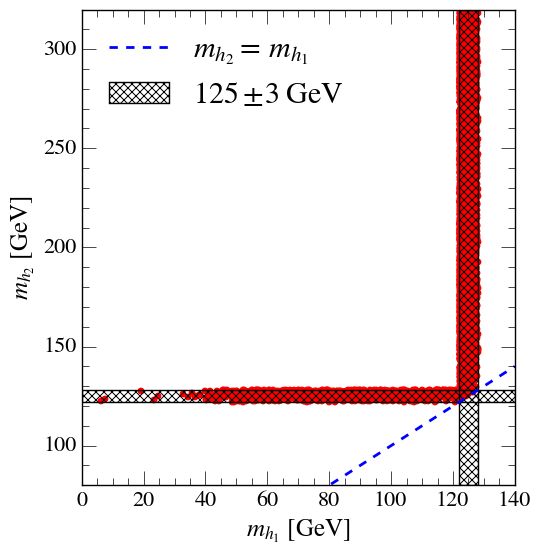

In [511]:
plot_mh2_mh1_scatter(df_pass_all, title, 'Thesis_plots/mh2_mh1_relaxed.png')